# importing libraries / modules 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

# loading data 

In [3]:
df=pd.read_csv('loan_detection.csv')

# basic eda and data cleaning 

In [4]:
df.head(10)

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,45,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,59,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,41,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
8,24,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9,25,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [5]:
df.tail()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41187,74,3,999,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [6]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

In [7]:
df.shape

(41188, 60)

In [8]:
df.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

In [10]:
df.isnull()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
''' since no null values are found, no need to handle missing data '''

' since no null values are found, no need to handle missing data '

In [12]:
df.duplicated().sum()

2417

In [13]:
''' but since the data is encoded to 0 and 1 , no need for removing duplicates'''

' but since the data is encoded to 0 and 1 , no need for removing duplicates'

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

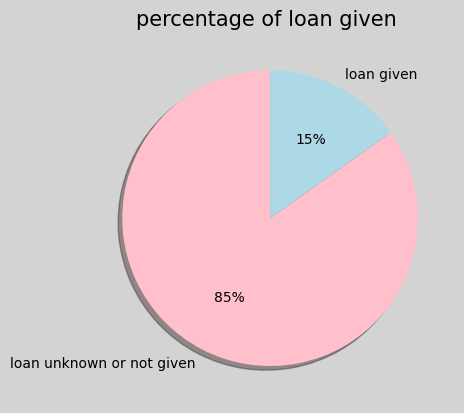

In [15]:
plt.figure(facecolor='lightgrey')
count1=df['loan_yes'].value_counts()
cols1=['pink','lightblue']
label1=['loan unknown or not given','loan given ']
plt.pie(count1,colors=cols1,autopct='%1.0f%%',shadow=True,startangle=90,labels=label1)
plt.title('percentage of loan given ', fontsize=15)
plt.show()

In [16]:
loan_yes=df['loan_yes'].sum()
loan_not_unknown=len(df)-df['loan_yes'].sum()
total=len(df)
print (f'loan not given to {round((loan_not_unknown*100)/total)}% applicants ')
print (f'loan given to {round((loan_yes*100)/total)}% applicants ')

loan not given to 85% applicants 
loan given to 15% applicants 


# feature selection through correlation 

In [17]:
df.corr()['Loan_Status_label']

age                              0.030399
campaign                        -0.066357
pdays                           -0.324914
previous                         0.230181
no_previous_contact             -0.324877
not_working                      0.121246
job_admin.                       0.031426
job_blue-collar                 -0.074423
job_entrepreneur                -0.016644
job_housemaid                   -0.006505
job_management                  -0.000419
job_retired                      0.092221
job_self-employed               -0.004663
job_services                    -0.032301
job_student                      0.093955
job_technician                  -0.006149
job_unemployed                   0.014752
job_unknown                     -0.000151
marital_divorced                -0.010608
marital_married                 -0.043398
marital_single                   0.054133
marital_unknown                  0.005211
education_basic.4y              -0.010798
education_basic.6y              -0

In [18]:
df.corr()['poutcome_success']

age                              0.035626
campaign                        -0.050893
pdays                           -0.950700
previous                         0.524045
no_previous_contact             -0.950283
not_working                      0.104134
job_admin.                       0.025069
job_blue-collar                 -0.061403
job_entrepreneur                -0.017238
job_housemaid                    0.002276
job_management                  -0.001302
job_retired                      0.068061
job_self-employed               -0.012871
job_services                    -0.028558
job_student                      0.083321
job_technician                  -0.005036
job_unemployed                   0.024612
job_unknown                      0.012136
marital_divorced                -0.010612
marital_married                 -0.029876
marital_single                   0.039238
marital_unknown                  0.007167
education_basic.4y              -0.005918
education_basic.6y              -0

# splitting data 

In [19]:
X=df.iloc[:,:-1]
y=df['Loan_Status_label']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [21]:
X


,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [22]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Loan_Status_label, Length: 41188, dtype: int64

In [23]:
print(X_train.shape,"  ", X_test.shape)
print(y_train.shape,"  ", y_test.shape)

(32950, 59)    (8238, 59)
(32950,)    (8238,)


# model selection 

In [24]:
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_train)

In [25]:
X_train_sc


array([[-1.66930454e-03, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [-8.64094846e-01,  5.13675879e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [ 1.81900684e+00,  1.23359337e+00,  1.94660673e-01, ...,
         2.93701532e+00, -2.51020518e+00, -1.84965343e-01],
       ...,
       [-4.80794606e-01, -5.66200360e-01, -5.14775262e+00, ...,
        -3.40481710e-01, -2.51020518e+00,  5.40641820e+00],
       [-1.66930454e-03, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [-1.05574497e+00, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01]])

In [26]:
X_test_sc

array([[-1.66930454e-03, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [-8.64094846e-01,  5.13675879e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [ 1.81900684e+00,  1.23359337e+00,  1.94660673e-01, ...,
         2.93701532e+00, -2.51020518e+00, -1.84965343e-01],
       ...,
       [-4.80794606e-01, -5.66200360e-01, -5.14775262e+00, ...,
        -3.40481710e-01, -2.51020518e+00,  5.40641820e+00],
       [-1.66930454e-03, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [-1.05574497e+00, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01]])

In [27]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [28]:
print(f'training accuracy : { round(lr.score(X_train,y_train)*100)}%')
print(f'test accuracy : { round(lr.score(X_test,y_test)*100)}%')

training accuracy : 90%
test accuracy : 90%


In [29]:
lrc=LogisticRegression()
lrc.fit(X_train_sc,y_train)

LogisticRegression()

In [30]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [31]:
print(f'training accuracy : { round(dt.score(X_train,y_train)*100)}%')
print(f'test accuracy : { round(dt.score(X_test,y_test)*100)}%')

training accuracy : 90%
test accuracy : 89%


In [32]:
xgb=XGBClassifier(gamma=0.7,reg_alpha=0.5,reg_lambda=0.2)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.7, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
print(f'training accuracy : { round(xgb.score(X_train,y_train)*100)}%')
print(f'test accuracy : { round(xgb.score(X_test,y_test)*100)}%')

training accuracy : 91%
test accuracy : 89%


# model training 

In [34]:
y_train_pred_lr=lr.predict(X_train)
y_test_pred_lr=lr.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)
y_test_pred_xgb=xgb.predict(X_test)

In [35]:
y_train[:3]

12556    0
35451    0
30592    0
Name: Loan_Status_label, dtype: int64

In [36]:
y_train_pred_lr[:3]

array([0, 0, 0], dtype=int64)

In [37]:
y_train_pred_xgb[:3]

array([0, 0, 0])

In [38]:
y_test[:3]

32884    0
3169     0
32206    0
Name: Loan_Status_label, dtype: int64

In [39]:
y_test_pred_lr[:3]

array([0, 0, 0], dtype=int64)

In [40]:
y_test_pred_xgb[:3]

array([0, 0, 0])

#  results 

<Axes: >

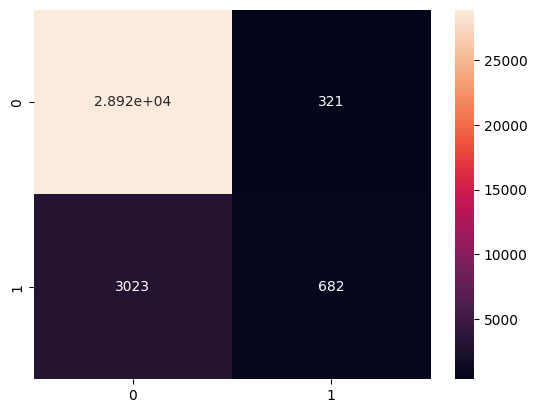

In [41]:
sns.heatmap(confusion_matrix(y_train,y_train_pred_lr),annot=True,fmt='.4g')

<Axes: >

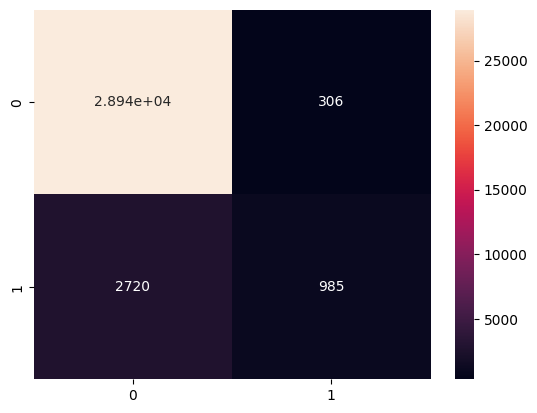

In [42]:
sns.heatmap(confusion_matrix(y_train,y_train_pred_xgb),annot=True,fmt='.4g')

In [43]:
accuracy_score(y_train,y_train_pred_lr)

0.8985128983308043

In [44]:
accuracy_score(y_train,y_train_pred_xgb)

0.9081638846737481

In [45]:
print(classification_report(y_train,y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29245
           1       0.68      0.18      0.29      3705

    accuracy                           0.90     32950
   macro avg       0.79      0.59      0.62     32950
weighted avg       0.88      0.90      0.87     32950



In [46]:
print(classification_report(y_train,y_train_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29245
           1       0.76      0.27      0.39      3705

    accuracy                           0.91     32950
   macro avg       0.84      0.63      0.67     32950
weighted avg       0.90      0.91      0.89     32950



<Axes: >

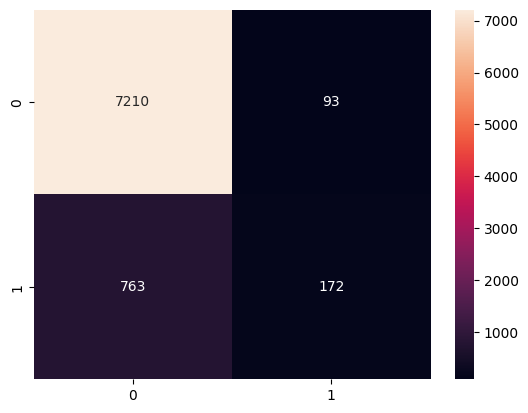

In [47]:
sns.heatmap(confusion_matrix(y_test,y_test_pred_lr),annot=True,fmt='.4g')

<Axes: >

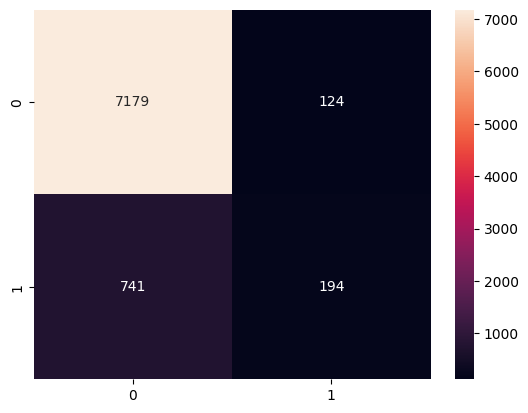

In [48]:
sns.heatmap(confusion_matrix(y_test,y_test_pred_xgb),annot=True,fmt='.4g')

In [49]:
accuracy_score(y_test,y_test_pred_xgb)

0.8949987861131342

In [50]:
accuracy_score(y_test,y_test_pred_lr)

0.896091284292304

In [51]:
print(classification_report(y_test,y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.65      0.18      0.29       935

    accuracy                           0.90      8238
   macro avg       0.78      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



In [52]:
print(classification_report(y_test,y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.21      0.31       935

    accuracy                           0.89      8238
   macro avg       0.76      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238



Thus for training set : both xgboost and logistic regression perform 
    with good accuracy but xgboost outperfomed by slight margin 

for test set : both had similar accuracy again but xgboost had better F1-score while logistic regression has better recall 

while both models performed with good accuracy , for the current purpose , logistic regression could be prefered as it's less computationally expensive than xgboost and also is generally more interpretable .